# Initial Exploratory Data Analysis

## Kaggle Dataset – [Cryptocurrency Historical Prices](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory)

### David Levy

In [1]:
# load dependencies
import kaggle
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# download `.zip` from Kaggle
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# extract all `.csv` files to a dedicated directory
with zipfile.ZipFile("cryptocurrencypricehistory.zip", 'r') as zip_ref:
    zip_ref.extractall("raw_data")

# instantiate a dictionary to hold our dataframes
frame_dict = {}

# itereate over files 
for csv in os.listdir("/Users/davidlevy/Desktop/project_1/raw_data_kaggle"):
    
    # ignore hidden files
    if csv[0] != ".":
        filepath = os.path.join("raw_data_kaggle", csv)
        frame_dict[csv.replace(".csv", "_df")] = pd.read_csv("raw_data_kaggle/" + csv)

In [4]:
# how many files do we have?
print(len(frame_dict))

23


In [5]:
# visualize the dataframe associated with the first key in the dictionary for sanity check
frame_dict[list(frame_dict.keys())[0]].head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [6]:
# visualize the data types associated with each column in the dataframes
frame_dict[list(frame_dict.keys())[0]].dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

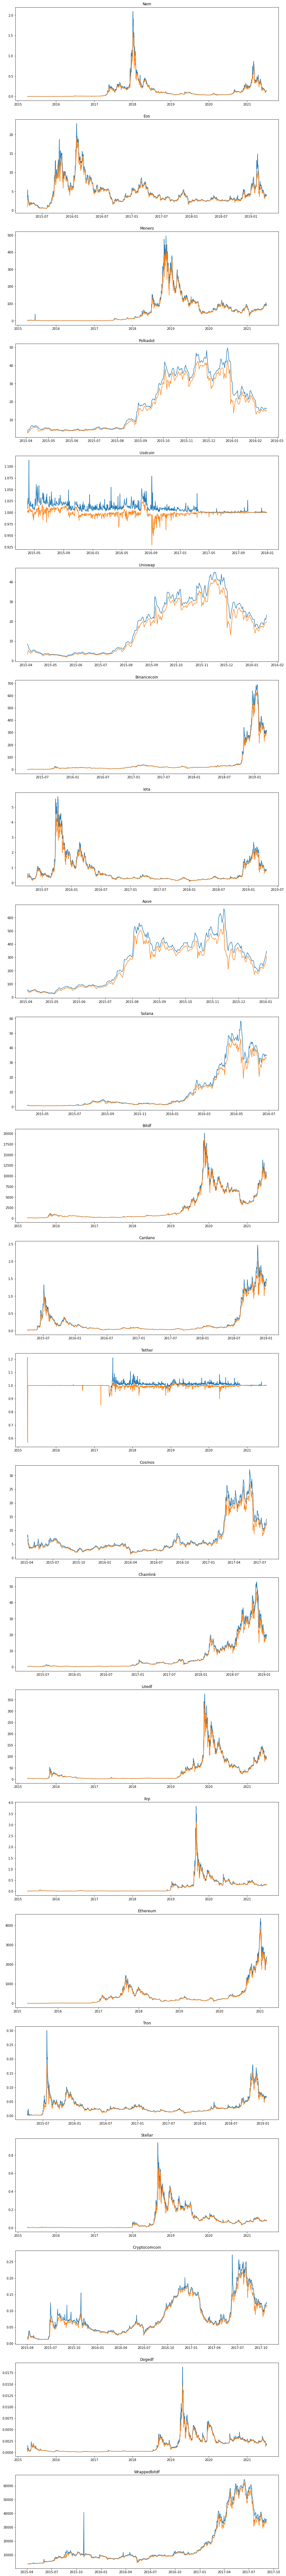

In [7]:
# initiate the figure and axis with 23 subplots in a vertical line
fig, ax = plt.subplots(23,1, figsize=(15, 150))

# instantiate a counter
i = 0

# loop through dictionary keys
for key in list(frame_dict.keys()):
    
    # transform `Date` column data to datetime64
    frame_dict[key]["Date"] = pd.to_datetime(frame_dict[list(frame_dict.keys())[0]]["Date"])
    
    # plot the highs and lows as a time series for each coin
    ax[i].plot(frame_dict[key]["Date"], frame_dict[key]["High"])
    ax[i].plot(frame_dict[key]["Date"], frame_dict[key]["Low"])
    ax[i].set_title(key.replace("coin_", "").replace("_df", "").title())
    
    # add to the counter
    i += 1

In [84]:
# close the plots
plt.close("all")

Perhaps not the most compelling visualization, but a good way to determine whether there are any major aberrations at a glance. We can see a few upward and downward spikes in several of the coins, but there doesn't seem to be much correlation in terms of when those spikes occur.

Text(0.5, 1.0, 'Volume')

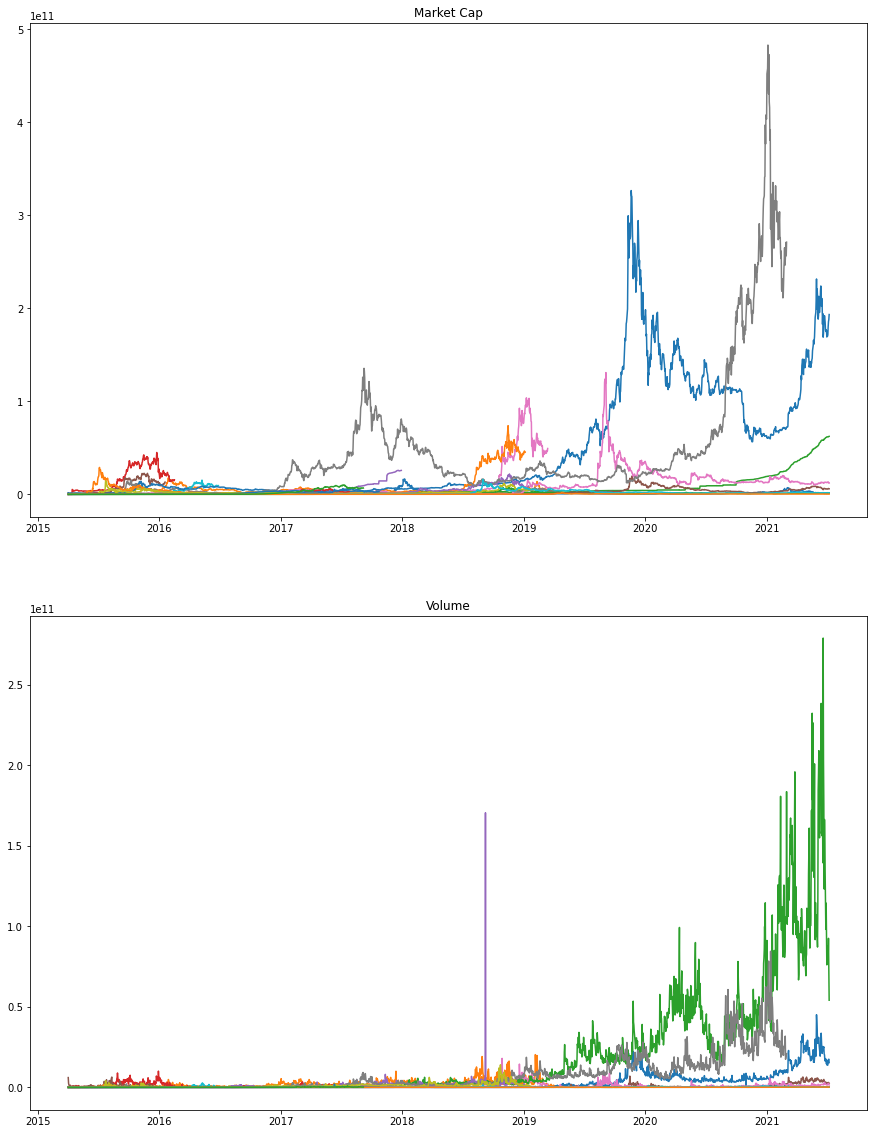

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

# loop through dictionary keys
for key in list(frame_dict.keys()):
    
    # plot the market cap as a time series for each coin
    ax[0].plot(frame_dict[key]["Date"], frame_dict[key]["Marketcap"])
    ax[1].plot(frame_dict[key]["Date"], frame_dict[key]["Volume"])

ax[0].set_title("Market Cap")
ax[1].set_title("Volume")

<AxesSubplot:>

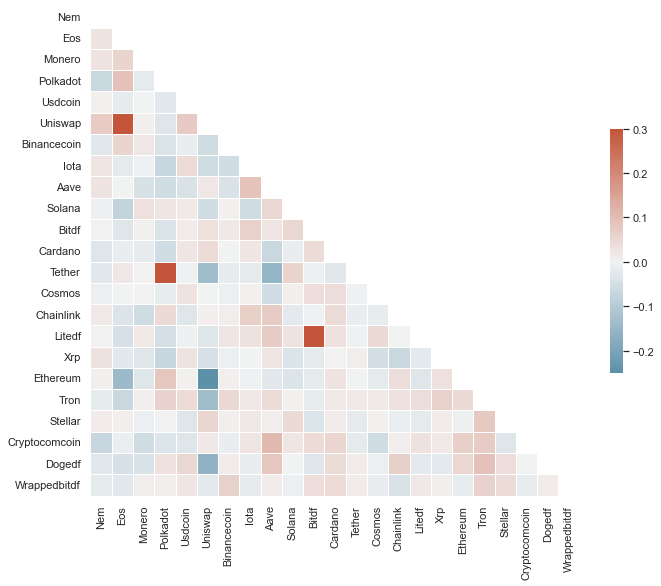

In [10]:
# create a dictionary holding return data

ret_dict = {}

for key in list(frame_dict.keys()):
    ret_dict[key.replace("coin_", "").replace("_df", "").title()] = \
    (frame_dict[key]["Close"] - frame_dict[key]["Open"]) / frame_dict[key]["Open"]

# compute the correlation matrix
corr = pd.DataFrame(ret_dict).corr()

# set seaborn graph style
sns.set_theme(style="white")

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# instantiate matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate divering colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw a heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})